In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("Datasets/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
x = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x[0:7,:])

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)
#x_train

[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]
 [-1.01769239 -0.34481683]
 [-1.01769239  0.41866944]]


In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train , y_train)

c:\users\intel\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


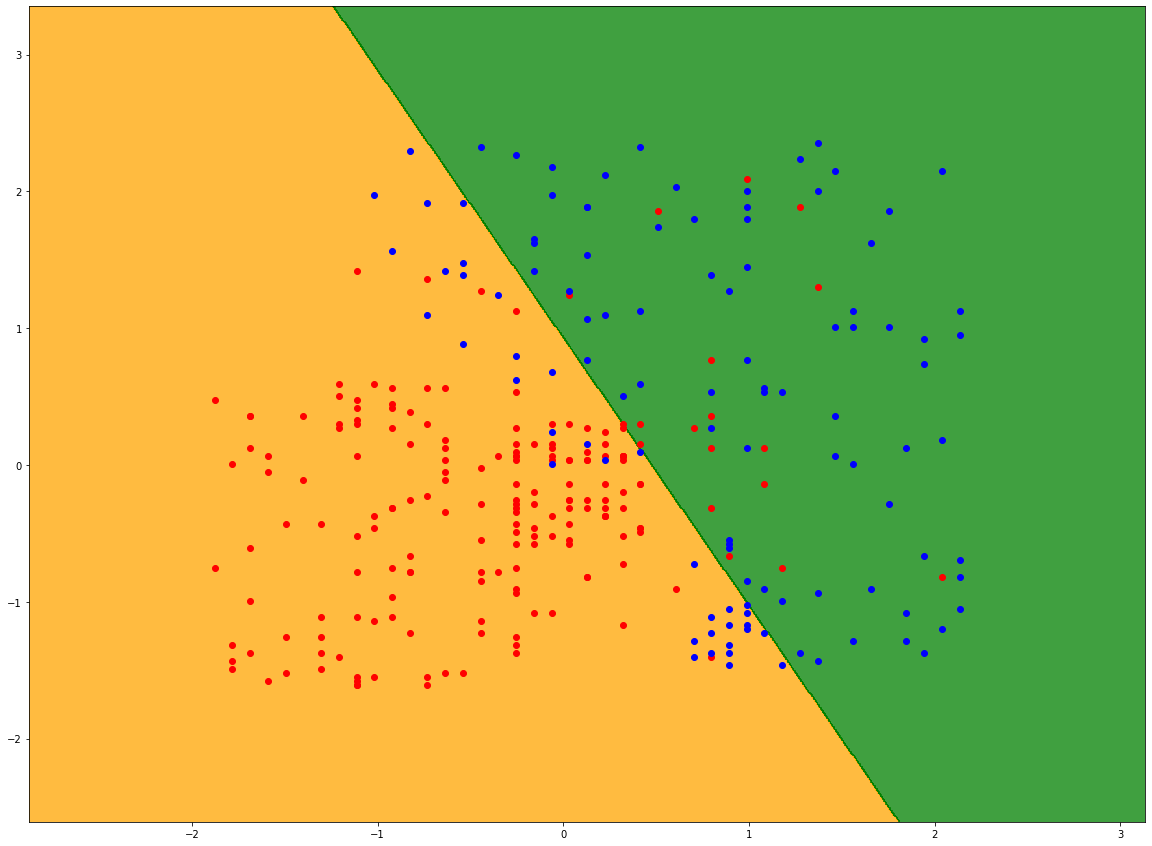

[[-2.87731056 -2.60750566]
 [-2.86731056 -2.60750566]
 [-2.85731056 -2.60750566]
 ...
 [ 3.11268944  3.35249434]
 [ 3.12268944  3.35249434]
 [ 3.13268944  3.35249434]]
 
 
 
[-2.87731056 -2.86731056 -2.85731056 ...  3.11268944  3.12268944
  3.13268944]
 
 
 
[[-2.87731056 -2.86731056 -2.85731056 ...  3.11268944  3.12268944
   3.13268944]
 [-2.87731056 -2.86731056 -2.85731056 ...  3.11268944  3.12268944
   3.13268944]
 [-2.87731056 -2.86731056 -2.85731056 ...  3.11268944  3.12268944
   3.13268944]
 ...
 [-2.87731056 -2.86731056 -2.85731056 ...  3.11268944  3.12268944
   3.13268944]
 [-2.87731056 -2.86731056 -2.85731056 ...  3.11268944  3.12268944
   3.13268944]
 [-2.87731056 -2.86731056 -2.85731056 ...  3.11268944  3.12268944
   3.13268944]]


In [15]:
from matplotlib.colors import ListedColormap
plt.rcParams["figure.figsize"] = (20,15)
x1_pix = np.arange(x_train[:,0].min() -1 , x_train[:,0].max() +1 , step=0.01)
x2_pix = np.arange(x_train[:,1].min() -1 , x_train[:,1].max() +1 , step=0.01)
x1 , x2  = np.meshgrid(x1_pix , x2_pix)

#plotting pixelated form of yellow and green sections
plt.contourf(x1 , x2 , classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape) , 
             alpha = 0.75 ,cmap = ListedColormap(('orange' ,'green')))
#for plotting red and blue points of train set
for i,j  in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train==j,0] , x_train[y_train==j ,1] ,
                c=ListedColormap(('red' ,'blue'))(i) , label=j)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(),x2.max())
plt.show()

print(np.array([x1.ravel(),x2.ravel()]).T)
print(" ")
print(" ")
print(" ")
print(x1.ravel())
print(" ")
print(" ")
print(" ")
print(x1)
